In [2]:
import torch
from torch import nn
import pickle
import numpy as np

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Linear(9216, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 15),
            nn.ReLU(),
            nn.Linear(15, 2)
        )


    def forward(self, input):
        x = self.convs(input)
        x = x.view(x.size(0), -1)
        #print(x.shape, cursor_position.shape)
        x = self.fc(x)
        x = self.fc2(x)
        return x

# load state dict
net = Net()
net.load_state_dict(torch.load('./model/slither5.pt'))

<All keys matched successfully>

In [6]:
data = pickle.load(open('./data/data2.pkl', 'rb'))
frames, keyboard, mouse, cursors = data

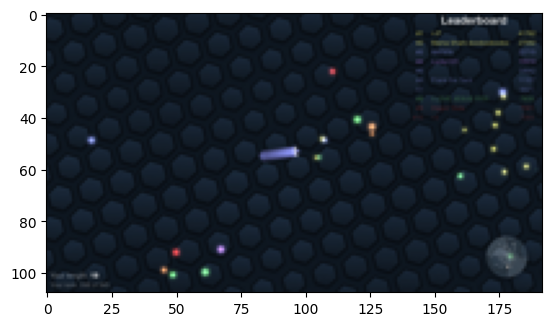

In [7]:
# plot a frame
import matplotlib.pyplot as plt
plt.imshow(frames[0])
plt.show()

In [21]:

import cv2# grayscale img
img = cv2.cvtColor(np.array(frames[0]), cv2.COLOR_RGB2GRAY)

newframe = torch.tensor(img, dtype=torch.float32)
newframe.shape

torch.Size([108, 192])

In [13]:
net(newframe)

RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[1, 108, 192, 3] to have 1 channels, but got 108 channels instead